In [1]:
import pickle
with open('pilot_conspiracy_video.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [3]:
len(b)

60

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [2]:
design_matrix = pd.read_csv("latest_video_feature.csv")

In [9]:
design_matrix['conspiracy'] = design_matrix['conspiracy'].astype('category')
design_matrix['mean_r'] = design_matrix['mean_r'].astype('float')
design_matrix['mean_g'] = design_matrix['mean_g'].astype('float')
design_matrix['mean_b'] = design_matrix['mean_b'].astype('float')
design_matrix['mean_s'] = design_matrix['mean_s'].astype('float')


design_matrix['var_r'] = design_matrix['var_r'].astype('float')
design_matrix['var_g'] = design_matrix['var_g'].astype('float')
design_matrix['var_b'] = design_matrix['var_b'].astype('float')
design_matrix['var_s'] = design_matrix['var_s'].astype('float')




## boxplot

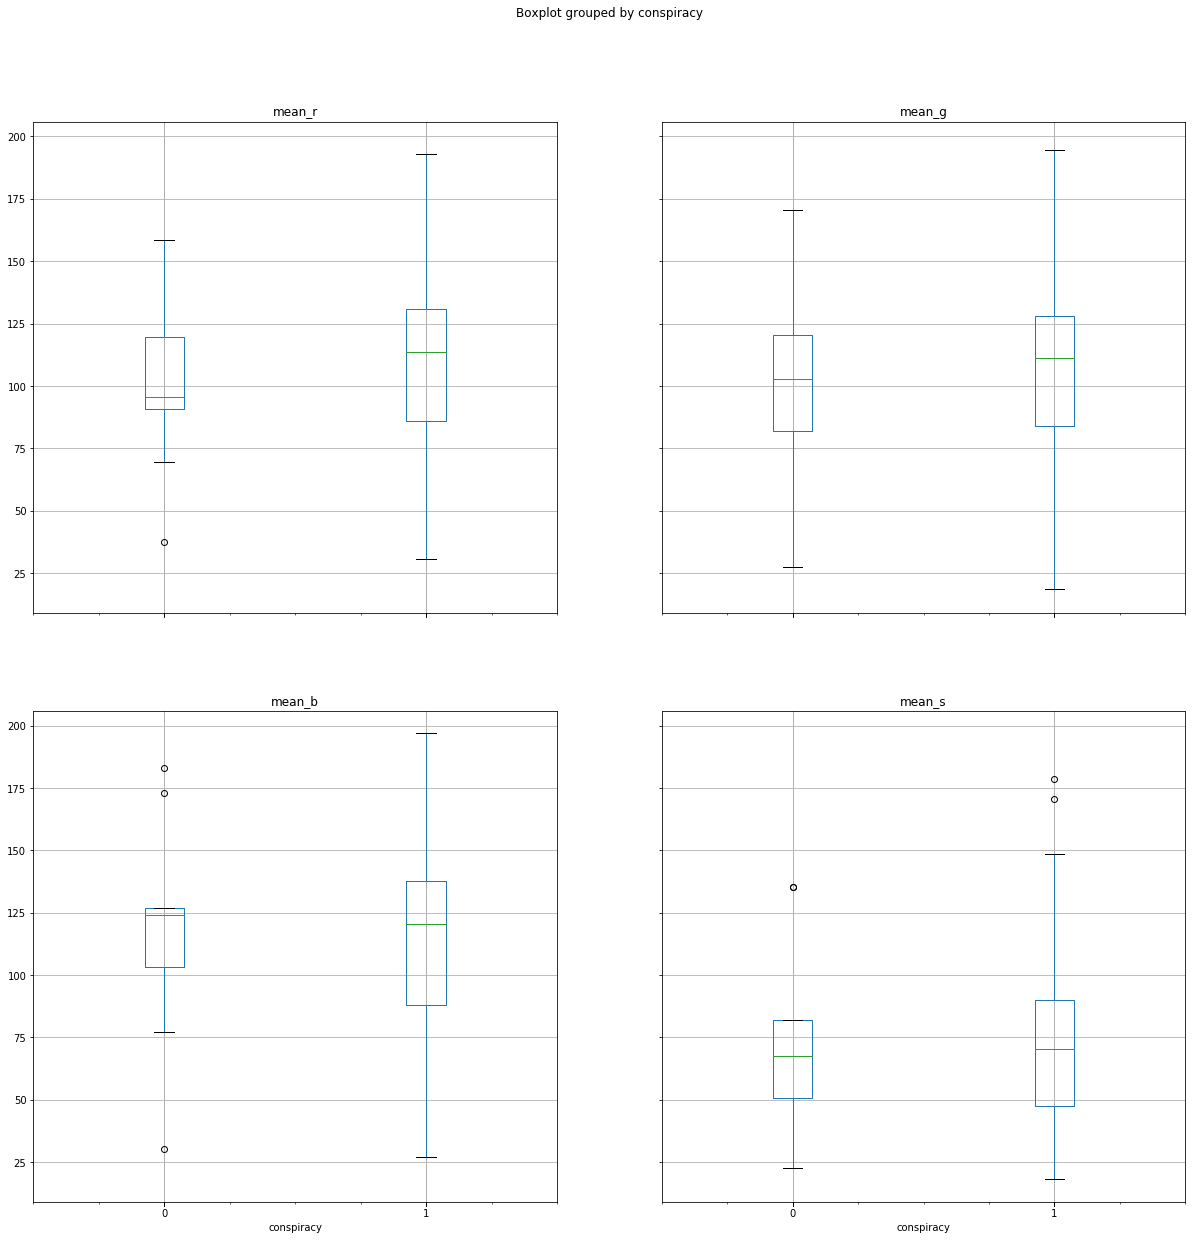

In [11]:
import matplotlib.pyplot as plt
design_matrix.boxplot(column=['mean_r','mean_g','mean_b','mean_s'],by='conspiracy',figsize=(20,20))
plt.savefig("pilot_mean.pdf", format="pdf")

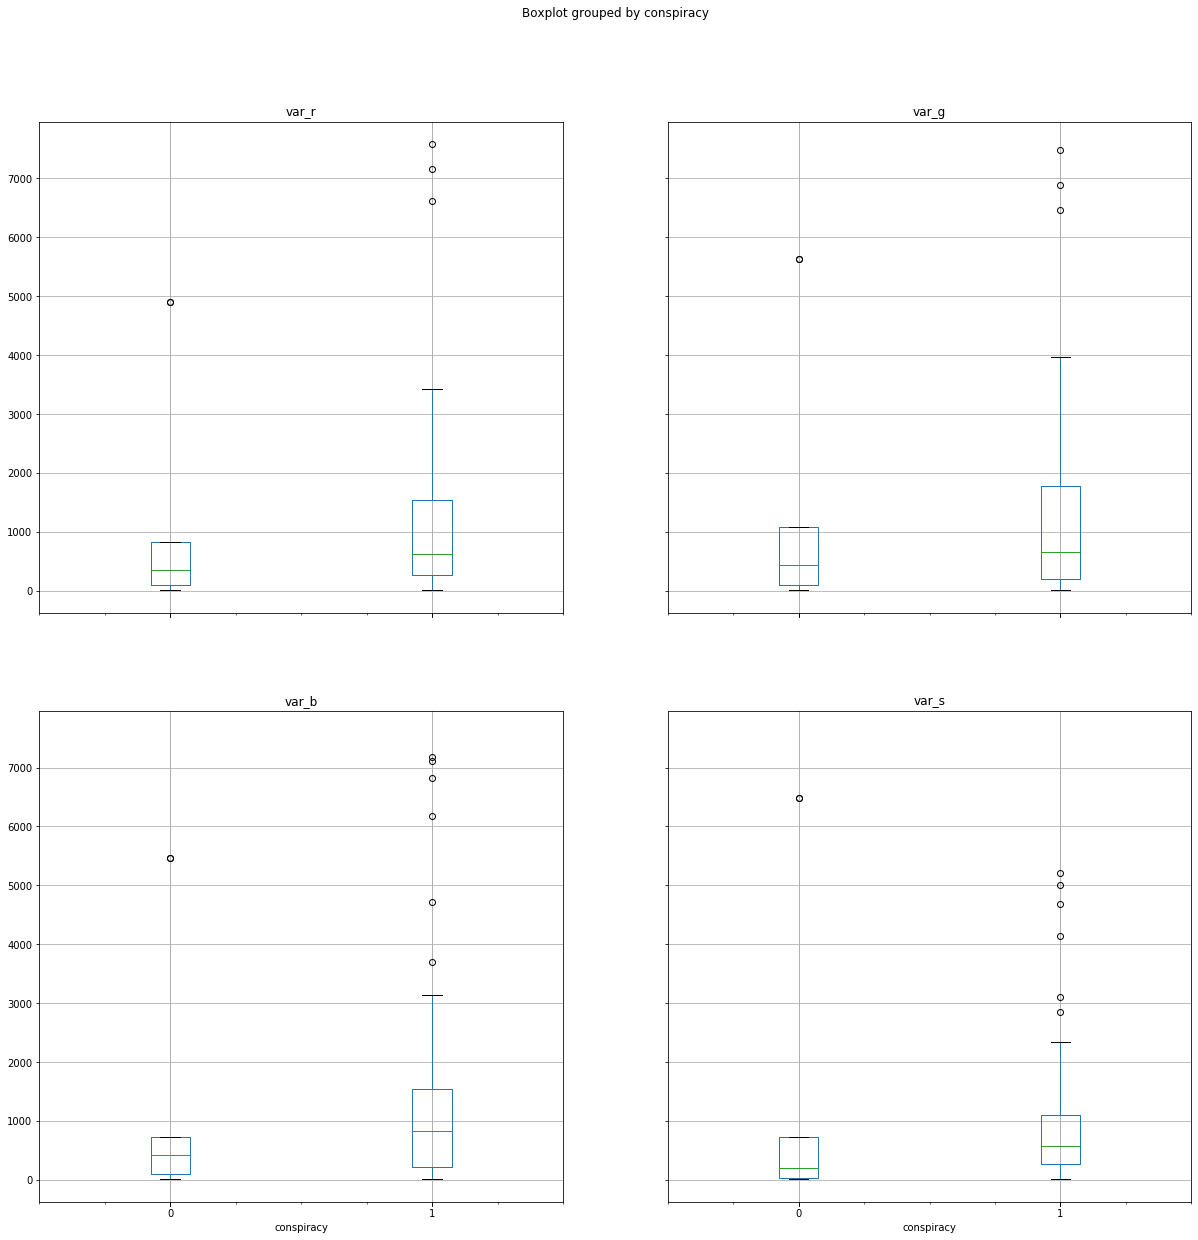

In [12]:
design_matrix.boxplot(column=['var_r','var_g','var_b','var_s'],by='conspiracy',figsize=(20,20))
plt.savefig("pilot_variance.pdf", format="pdf")

## Levene test

In [3]:
design_matrix.head()

,videoid,conspiracy,var_r,var_g,var_b,var_h,var_s,var_v,var_bright,var_bright_sd,...,g_mean,b_mean,h_mean,s_mean,v_mean,bright_mean,lightning_mean,contrast_mean,colorful_mean,color_lag
0,yK_sYnIAlq8,1,39.735940,4.285683,2.579384,70.055962,53.060975,34.136485,9.055785,18.063755,...,23.025519,22.312546,80.212427,112.116998,48.356227,28.515752,40.945080,157.221541,63.422343,0.991899
1,MgeUbM71dsY,1,255.749607,257.005811,253.642286,56.567895,78.030562,260.346801,253.658429,42.439448,...,132.845450,125.509515,45.665760,67.678632,158.629030,139.334119,73.502294,216.984881,44.337643,0.944731
2,FbSuXar7Fp0,1,1452.679042,1552.452874,1649.767356,661.483349,254.040344,1540.272677,1525.278949,356.238672,...,66.541025,66.971365,49.284852,42.397687,75.840837,68.212201,61.353242,222.359436,27.779183,0.935508
3,CuUL_PWEFhk,1,58.121892,50.092409,49.621182,4.213150,42.556652,58.052321,51.332905,8.605637,...,103.244246,114.315738,102.465030,71.021306,118.257641,102.426413,69.818726,231.836712,28.057106,0.986489
4,u_2e69CEN2g,1,1794.555572,1943.184029,1866.170049,664.501458,994.812224,1708.034524,1856.031186,224.674511,...,88.275974,86.911245,69.260375,89.706304,109.810351,91.415325,62.995589,209.090610,46.184953,0.922361


In [28]:
df1 = design_matrix.groupby('conspiracy')['var_s'].apply(list).reset_index(name='var_s')
var_s = stats.levene(df1.iloc[0]['var_s'],df1.iloc[1]['var_s'],center='mean') ## ‘median’ : Recommended for skewed (non-normal) distributions>
var_s

In [4]:
def levene(col,df,mode):
    df = design_matrix.groupby('conspiracy')[col].apply(list).reset_index(name=col)
    var = stats.levene(df.iloc[0][col],df.iloc[1][col],center=mode)
    return var
    

In [75]:
levene('var_s',design_matrix,'trimmed')

LeveneResult(statistic=18.57042361526548, pvalue=6.975423617160365e-05)

In [17]:
levene('var_colorful',design_matrix,'trimmed')

LeveneResult(statistic=1.3270791755718703, pvalue=0.24946751460445565)

In [18]:
levene('var_colorful',design_matrix,'median')

LeveneResult(statistic=0.3635485439044247, pvalue=0.5466056039027014)

In [70]:
levene('var_b',design_matrix,'trimmed')

LeveneResult(statistic=3.573299881165851, pvalue=0.06408702080489072)